# MODUL 1 HISTOGRAM KONVOLUSI DAN OPERASI DASAR CITRA

Baris code di bawah ini digunakan untuk melakukan import module.
import digunakan untuk menspesifikasikan member dari library (module) yang akan digunakan dan as digunakan untuk membuat alias ketika melakukan import module

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

Fungsi di bawah berfungsi untuk memanggil library matplotlib.pyplot dan untuk menginputkan gambar yang ada, dan 
script 'plt' berfungsi untuk memanggil library matplotlib.pyplot serta berfungsi untuk menampilkan gambar dari variabel 'img'

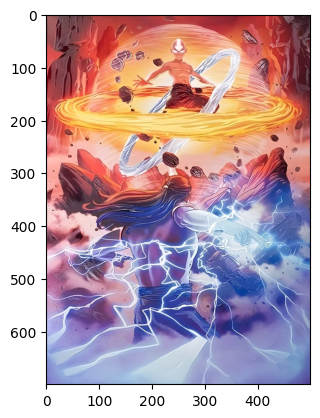

In [19]:
image = img.imread("aang.jpg")
plt.imshow(image)

# 1. Mengubah Gambar Menjadi GrayScale

Fungsi dibawah digunakan untuk mengkonversi warna dan citra menjadi gray

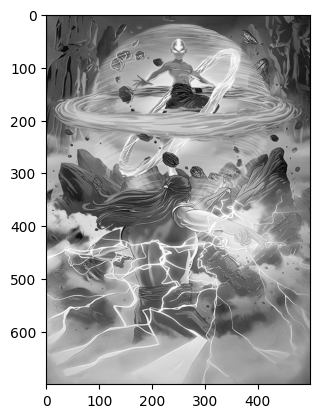

In [20]:
grayimage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap='gray')

Code dibawah memiliki fungsi untuk menghitung jumlah kemunculan setiap nilai intensitas piksel dalam citra keabuan (grayimage), dimana dapat diartikan bahwa kode tersebut digunakan untuk menghitung distribusi histogram dari nilai intensitas piksel dalam citra keabuan.

In [21]:
sumgray=np.zeros(256)

tinggi , lebar = grayimage.shape
print("tinggi:", tinggi, ", lebar:", lebar)
sumGray = np.zeros(256).astype(int)
for i in range(tinggi):
    for j in range(lebar):
        val = grayimage[i,j]
        sumGray[val] += 1

print(sumGray)

tinggi: 700 , lebar: 500
[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 2

# 2. Membuat Histogram

Code dibawah melakukan pengolahan pada histogram citra yang telah dihitung sebelumnya. Dimana nilai dari histogram yang telah di normalisasi sebelumnya ditampilkan sebagai diagram batang dengan bantuan matplotlib, dengan sumbu y menunjukkan frekuensi dan sumbu x menunjukkan intensitas piksel.

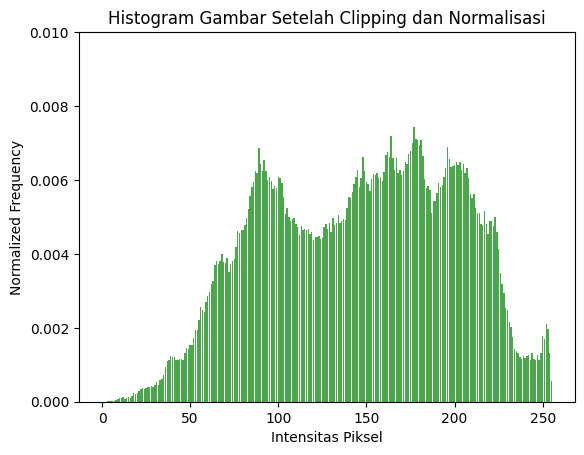

In [25]:
sum_hist = np.sum(hist)
normalized_hist = hist / sum_hist  
cumulative_hist = np.cumsum(normalized_hist)

grayIndex = np.arange(256)

plt.bar(grayIndex, normalized_hist, color='green', alpha=0.7)

plt.ylim(0, 0.01)

plt.xlabel('Intensitas Piksel')
plt.ylabel('Normalized Frequency')
plt.title('Histogram Gambar Setelah Clipping dan Normalisasi')
plt.show()

# 3. Konvolusi Pada Citra Menggunakan Kernel

Code di bawah ini berfungsi untuk menetapkan variabel kernel sebagai suatu variabel  yang bertipe array

In [26]:
kernel = np.array([[1, 2, -1, 1], [0, 2, 1, 2 ], [2, 1, 1, 0 ], [1, 0, -1, 0]])
print(kernel)

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


Code dibawah berfungsi untuk mengimplementasikan operasi konvolusi pada citra abu-abu dengan menggunakan sebuah kernel. Dimana dilakukan penyesuaian ukuran padding citra abu-abu kemudian dilakukan iterasi pada setiap piksel pada citra yang telah di padding, dimana subset sesuai ukuran kernel diambil dan dikalikan dengan kernel.

In [27]:
img_tinggi, img_lebar = grayimage.shape
kernel_tinggi, kernel_lebar = kernel.shape

padding_size = int((kernel_tinggi - 1) / 2)
pad_width=((padding_size, padding_size+1), (padding_size, padding_size+1))
padding_grayimage = np.pad(grayimage, pad_width, mode='constant')
zeroPadding = np.zeros((img_tinggi, img_lebar))
for i in range(zeroPadding.shape[0]):
    for j in range(zeroPadding.shape[1]):   
        subset = padding_grayimage[i:i + kernel_tinggi, j:j + kernel_lebar]
        weighted_subset = subset * kernel
        sum_of_weighted_subset = np.sum(weighted_subset)
        zeroPadding[i][j] = np.round(sum_of_weighted_subset)
print (zeroPadding)


[[ 824. 1142. 1024. ...  194.  179.  161.]
 [1108. 1460. 1312. ...  289.  280.  247.]
 [1083. 1418. 1260. ...  326.  325.  286.]
 ...
 [1233. 1809. 1737. ... 1140.  857.  859.]
 [1383. 1803. 1758. ... 1137.  850.  759.]
 [1084. 1199. 1183. ...  754.  472.  473.]]


Code dibawah berfungsi untuk menghitung nilai minimum dan maksimum dari matriks 'zeroPadding', yang merupakan hasil konvolusi sebelumnya.

In [28]:
min = np.min(zeroPadding)
max = np.max(zeroPadding)
clipping = np.round((zeroPadding - min) / (max - min))
print(clipping)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


fungsi dari code dibawah ini untuk menampilkan hasil gambar yang sudah di olah sebelumnya pada variable clip dengan color map yang gray.

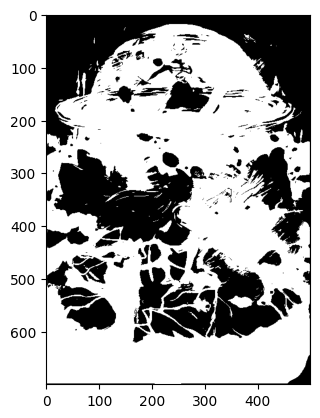

In [29]:
plt.imshow(clipping,cmap='gray')

ROTASI = 40 | TRANSLASI = X : 300, Y : -163

# 4. Melakukan Translasi 

Code dibawah merupakan fungsi memindahkan setiap piksel citra sesuai dengan jarak yang diinginkan. Proses ini dilakukan pada setiap piksel dengan menggunakan nilai pada baris dan kolom grayimage untuk menentukan posisi baru piksel pada citra hasil translasi.

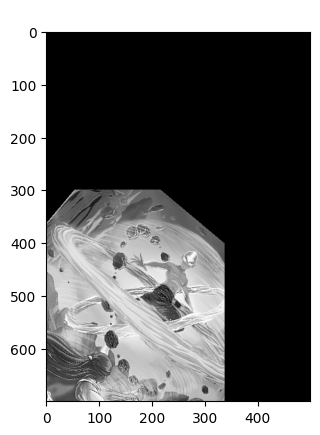

In [47]:
def trans(rotated_image, x_val, y_val):
    transx = x_val
    transy = y_val
    result = np.zeros_like(rotated_image)
    for i in range(rotated_image.shape[0]):
        for j in range(rotated_image.shape[1]):
            x = j - transx
            y = i - transy
            if 0 <= x < rotated_image.shape[1] and 0 <= y < rotated_image.shape[0]:
                result[i][j] = rotated_image[y][x]
            else:
                result[i][j] = 0
    return result
# Memanggil fungsi rotate untuk melakukan rotasi
rotated_image = rotate(gray_image, 40)  # Rotasi citra sebesar 40 derajat berlawanan arah jarum jam

# Memanggil fungsi trans untuk melakukan translasi pada gambar yang sudah dirotasi
translated_image = trans(rotated_image, -163, 300)  # Translasi citra sebesar (-163, 300)

plt.imshow(translated_image, cmap='gray')
plt.title(' ')
plt.show()


# 5. Melakukan Rotasi

Code dibawah memutar citra sesuai dengan sudut yang diinginkan yaitu 40 derajat. Proses ini dilakukan pada setiap piksel citra dengan menggunakan nilai baris dan kolom piksel pada citra yang baru ditranslasi.

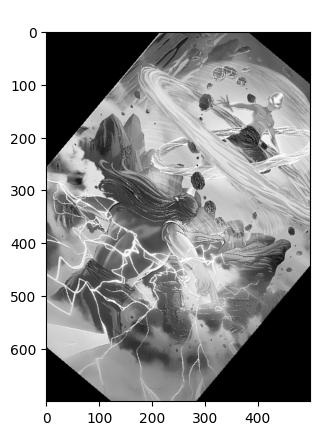

In [46]:
def rotate(image, degree):
    result = np.zeros(((image.shape[0]), (image.shape[1])))
    rad = (degree * np.pi) / 180
    x_cent = image.shape[1] // 2
    y_cent = image.shape[0] // 2
    cosa = np.cos(-rad)
    sina = np.sin(-rad)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = int(cosa * (j - x_cent) - sina * (i - y_cent) + x_cent)
            y = int(sina * (j - x_cent) + cosa * (i - y_cent) + y_cent)
            if (x >= 0) and (x <= image.shape[1] - 1) and (y >= 0) and (y <= image.shape[0] - 1):
                result[i][j] = image[y][x]
            else:
                result[i][j] = 0
    return result
rotated_image = rotate(gray_image, 40)

plt.imshow(rotated_image, cmap='gray')
plt.title(' ')
plt.show()

# 6. Melakukan Pencerminan

Code dibawah merupakan fungsi 'flip_y', dimana akan menghasilkan citra yang di putar secara vertikal. Setiap piksel pada citra dipindahkan ke posisi yang sesuai di citra yang di putar. Hasilnya disimpan dalam matriks 'y'. Kemudian, citra yang diputar ditampilkan menggunakan 'imshow()' dari matplotlib.

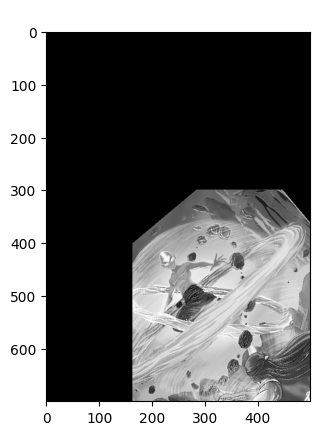

In [45]:
def flip_y(translated_image: np.array)->np.array:
    y = np.zeros(translated_image.shape)
    for i in range(translated_image.shape[0]):
        for j in range (translated_image.shape[1]):
            y[i][j] = translated_image[i,translated_image.shape[1]-1-j]
    return y
flipped_image = flip_y(translated_image)
plt.imshow(flipped_image, cmap='gray')
plt.title(' ')
plt.show()

# 7. Dilatasi

Code dibawah berfungsi untuk melakukan dilatasi pada citra yang telah di putar secara vertikal, dengan faktor skala tertentu. Citra yang telah dilatsi ditampilkan menggunakan 'imshow()' dari matplotlib dan di simpan sebagai file gambar JPG dengan nama yang sesuai. 

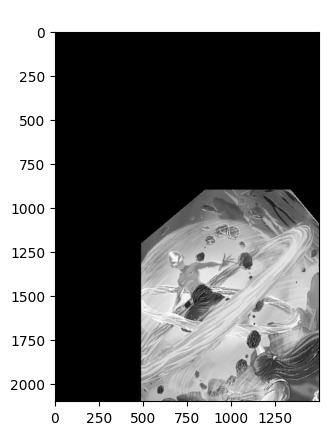

Hasil dilatasi disimpan sebagai: result_dilated_3.jpg


In [44]:
def dilasi(flipped_image, scale_factor):
    if flipped_image is None:
        print("Error: Flipped image is empty.")
        return

    dilated_image = cv.resize(flipped_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_LINEAR)

    plt.imshow(dilated_image, cmap='gray')
    plt.title(' ')
    plt.show()

    result_path = f'result_dilated_{scale_factor}.jpg'
    cv.imwrite(result_path, dilated_image)
    print(f"Hasil dilatasi disimpan sebagai: {result_path}")

flipped_image = flip_y(translated_image)  
dilasi(flipped_image,3)